In [1]:
from gurobipy import *
import matplotlib.pyplot as pyplot
from math import exp

In [2]:
m = Model()
v0 = m.addVar()
v1 = m.addVar()
m.update()
m.addConstr(v0-v1 <= 4)
m.addConstr(v0 + v1 <= 4)
m.addConstr(-0.25*v0 + v1 <= 1)
m.setObjective(v1, GRB.MAXIMIZE)
m.params.outputflag = 0
m.optimize()

Academic license - for non-commercial use only


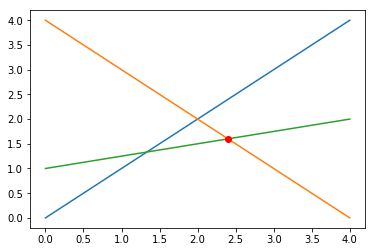

In [3]:
pyplot.plot([0,4], [0,4])
pyplot.plot([4,0], [0,4])
pyplot.plot([0,4], [1,2])
pyplot.plot([v0.x], [v1.x], 'ro')
pyplot.show()

# Lineare Programmierung
<br>https://www.youtube.com/watch?v=p_-MQzeFlh0
<br>
<br> Maximieren Sie: Z = x2 + 2 * x1
<br>
<br> Nebenbedingungen:
<br> 1. x1 >= 0
<br> 2. x2 <= 6 + x1
<br> 3. x2 <= 5 + x1 * 1/4
<br> 4. x2 <= 34/3 - x1 * 4/3
<br> 5. x2 >= -4 + x1 * 1/5

In [4]:
m = Model()
x1 = m.addVar()
x2 = m.addVar(lb=-4)

z = x2 + 2*x1
m.update()

m.addConstr(x1 >= 0)
m.addConstr(x2 <= 6 + x1)
m.addConstr(x2 <= 5 + x1*1/4)
m.addConstr(x2 <= 34/3 - x1*4/3)
m.addConstr(x2 >= -4 + x1*1/5)

m.setObjective(z, GRB.MAXIMIZE)
m.optimize()

Optimize a model with 5 rows, 2 columns and 9 nonzeros
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [4e+00, 4e+00]
  RHS range        [4e+00, 1e+01]
Presolve removed 1 rows and 0 columns
Presolve time: 0.02s
Presolved: 4 rows, 2 columns, 8 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.0903125e+01   1.486849e+00   0.000000e+00      0s
       2    1.8000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.03 seconds
Optimal objective  1.800000000e+01


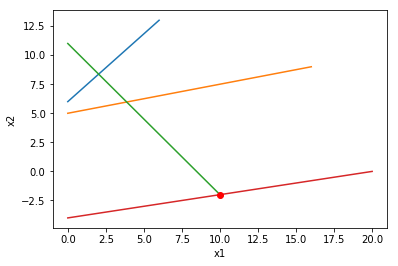

In [5]:
pyplot.plot([0,6], [6,13])
pyplot.plot([0,16], [5,9])
pyplot.plot([0,10], [11,-2])
pyplot.plot([0,20], [-4,0])
pyplot.plot([x1.x], [x2.x], 'ro')
pyplot.xlabel('x1')
pyplot.ylabel('x2')
pyplot.show()

# Example with only one value

In [8]:
mischsignal = 7
t_1 = 3     # erwartet: 1x
t_2 = 2     # erwartet: 2x

# Using Gurobi
# add lower and upperbound
m = Model()
lamb_1 = m.addVar(vtype=GRB.CONTINUOUS, name="lamb_1")
lamb_2 = m.addVar(vtype=GRB.CONTINUOUS, name="lamb_2")

# Set Objective - Zielfunktion
z = (lamb_1 * t_1 + lamb_2* t_2) #?
#m.addConstr(z <= mischsignal)
#m.setObjective(z, GRB.MAXIMIZE)
m.setObjective((mischsignal - z)*(mischsignal - z), GRB.MINIMIZE)

# Constraints
# instead use lowerbound = 0
m.addConstr(lamb_1 >= 0)
m.addConstr(lamb_2 >= 0)

#m.addConstr(lamb_1 + lamb_2 <= mischsignal)

# Optimize
m.optimize()

for v in m.getVars():
    print('%s: %g' % (v.varName, v.x)) # bezieht sich nicht auf variable name
    


Optimize a model with 2 rows, 2 columns and 2 nonzeros
Model has 3 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+01, 4e+01]
  QObjective range [8e+00, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 2 rows and 0 columns
Presolve time: 0.02s
Presolved: 0 rows, 2 columns, 0 nonzeros
Presolved model has 3 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 1
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -6.99510000e+04  4.90000000e+01  1.67e+03 4.20e+01  9.62e+05     0s
   1   3.16585629e+04 -3.41496351e+04  1.67e-03 0.00e+00  3.29e+04     0s
   2   4.35525425e+03 -5.27917515e+03  1.67e-09 7.11e-15  4.82e+03     0s
   3   5.39483181e+02 -8.64658063e+

# Piecewise Linear Objective
https://www.gurobi.com/documentation/8.1/examples/piecewise_py.html#subsubsection:piecewise.py

In [9]:
def f(u):
    return exp(-u)

def g(u):
    return 2 * u * u - 4 * u

try:

    # Create a new model
    m = Model()

    # Create variables
    lb = 0.0
    ub = 1.0

    x = m.addVar(lb, ub, name='x')
    y = m.addVar(lb, ub, name='y')
    z = m.addVar(lb, ub, name='z')

    # Set objective for y
    m.setObjective(-y)

    # Add piecewise-linear objective functions for x and z
    npts = 101
    ptu = []
    ptf = []
    ptg = []

    for i in range(npts):
        ptu.append(lb + (ub - lb) * i / (npts - 1))
        ptf.append(f(ptu[i]))
        ptg.append(g(ptu[i]))

        
    #print('ptu: ', type(ptu))
    #print('ptu: ', ptu)
    #print('ptf: ', type(ptf))
    m.setPWLObj(x, ptu, ptf)
    m.setPWLObj(z, ptu, ptg)
    
    m.update()

    #print('x: ', m.getPWLObj(x))
    #print('z: ', m.getPWLObj(z))

    # Add constraint: x + 2 y + 3 z <= 4
    m.addConstr(x + 2 * y + 3 * z <= 4, 'c0')

    # Add constraint: x + y >= 1
    m.addConstr(x + y >= 1, 'c1')

    # Optimize model as an LP
    m.optimize()
    
    #print('bla:', m.getPWLObj(x))

    print('IsMIP: %d' % m.IsMIP)
    for v in m.getVars():
        print('%s %g' % (v.VarName, v.X))
    print('Obj: %g' % m.ObjVal)
    print('')
    

    # Negate piecewise-linear objective function for x
    for i in range(npts):
        ptf[i] = -ptf[i]

    m.setPWLObj(x, ptu, ptf)

    # Optimize model as a MIP
    m.optimize()

    print('IsMIP: %d' % m.IsMIP)
    for v in m.getVars():
        print('%s %g' % (v.VarName, v.X))
    print('Obj: %g' % m.ObjVal)

except GurobiError as e:
    print('Error code ' + str(e.errno) + ": " + str(e))

except AttributeError:
    print('Encountered an attribute error')
    

Optimize a model with 2 rows, 3 columns and 5 nonzeros
Model has 2 piecewise-linear objective terms
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Presolve time: 0.04s
Presolved: 2 rows, 3 columns, 5 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -2.6321206e+00   5.000000e-01   0.000000e+00      0s
       2   -1.9346239e+00   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.05 seconds
Optimal objective -1.934623931e+00
IsMIP: 0
x 0.69
y 0.725
z 0.62
Obj: -1.93462

Optimize a model with 2 rows, 3 columns and 5 nonzeros
Model has 2 piecewise-linear objective terms
Variable types: 3 continuous, 0 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective -1.3678794
Preso

# Simple Audio Example

In [10]:
mischsignal = [0.0, 1.0, 1.0, 3.0, 2.0, 0.0]
ton_1 = [0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
ton_2 = [0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
ton_3 = [0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
ton_4 = [0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
ton_5 = [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
freq = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

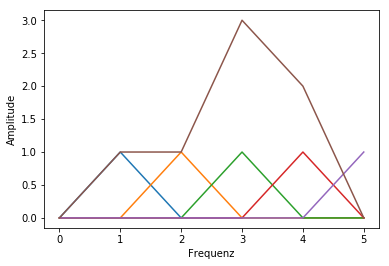

In [11]:
pyplot.plot(freq, ton_1)
pyplot.plot(freq, ton_2)
pyplot.plot(freq, ton_3)
pyplot.plot(freq, ton_4)
pyplot.plot(freq, ton_5)
pyplot.plot(freq, mischsignal)
pyplot.xlabel('Frequenz')
pyplot.ylabel('Amplitude')
pyplot.show()

In [13]:
m = Model()
lamb_1 = m.addVar(vtype = GRB.INTEGER, name = 'lamb_1')
#lamb_2 = m.addVar(vtype = GRB.INTEGER, name = 'lamb_2')
#lamb_3 = m.addVar(vtype = GRB.INTEGER, name = 'lamb_3')
#lamb_4 = m.addVar(vtype = GRB.INTEGER, name = 'lamb_4')

m.setObjective(lamb_1, GRB.MAXIMIZE)
#m.setObjectiveN(lamb_1, 1) # Position ist wichitg!!!
#m.setObjectiveN(lamb_2, 2)
#m.setObjectiveN(lamb_3, 3)
#m.setObjectiveN(lamb_4, 4)
m.update()

t1 = m.addVar(name = 't1')
t2 = m.addVar(name = 't2')
t3 = m.addVar(name = 't3')
t4 = m.addVar(name = 't4')
mix = m.addVar(name = 'mix')

m.setPWLObj(t1, freq, ton_1)
#m.setPWLObj(t2, freq, ton_2)
#m.setPWLObj(t3, freq, ton_3)
#m.setPWLObj(t4, freq, ton_4)
m.setPWLObj(mix, freq, mischsignal)

m.update()

#m.addConstr(mix - (lamb_1 * t1 +
#                   lamb_2 * t2 +
#                   lamb_3 * t3 +
#                   lamb_4 * t4)<= 1)

print('mix:', m.getPWLObj(mix))
print('t1', m.getPWLObj(t1))

#m.addConstr(mix - (lamb_1*t1) <= 10)
#m.addConstr(lamb_1 <= 10)
#m.addConstr(2 * lamb_1 + 3 * t1 + mix <= 10, 'c0')
#m.addConstr(lamb_1 * t1 <= 3)
m.addConstr(mix <= lamb_1*t1)

m.optimize()

print('t1: ', m.getPWLObj(t1))
print('mix: ', m.getPWLObj(mix))

for v in m.getVars():
    print('%s: %g' % (v.varName, v.x))

mix: [(0.0, 0.0), (1.0, 1.0), (2.0, 1.0), (3.0, 3.0), (4.0, 2.0), (5.0, 0.0)]
t1 [(0.0, 0.0), (1.0, 1.0), (2.0, 0.0), (3.0, 0.0), (4.0, 0.0), (5.0, 0.0)]
Optimize a model with 0 rows, 6 columns and 0 nonzeros
Model has 1 quadratic constraint
Model has 2 piecewise-linear objective terms
Variable types: 5 continuous, 1 integer (0 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 0 rows and 3 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.05 seconds
Thread count was 1 (of 4 available processors)

Solution count 1: -0 

Best objective -0.000000000000e+00, best bound -, gap -


GurobiError: Q matrix is not positive semi-definite (PSD)